# 1D FEM: Symbolic Computation of Elementary Stiffness and Mass Matrix 

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"% plt.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported sympy -- Version: 1.8
Succesfully imported matplotlib.pyplot


## Section 1/2: One-Dimensional Linear Lagrange Shape Function

### Assume element length 1 and thus no scaling with mesh width

contribution to the stiffness matrix
⎡1   -1⎤
⎢      ⎥
⎣-1  1 ⎦
contribution to the mass matrix
⎡1/3  1/6⎤
⎢        ⎥
⎣1/6  1/3⎦


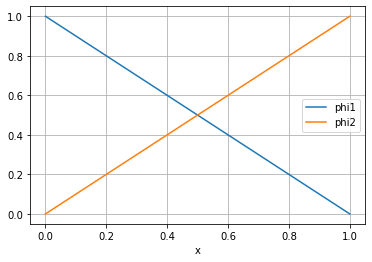

In [2]:
sym.var('x')
phi1 = 1-x
phi2 = x
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Assume element length h and thus scaling with h 

In [3]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (xl-x)/(h)
phi2 = (x-xl-h)/(h)
phi = sym.Matrix([phi1, phi2])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

contribution to the stiffness matrix
⎡ 1   -1 ⎤
⎢ ─   ───⎥
⎢ h    h ⎥
⎢        ⎥
⎢-1    1 ⎥
⎢───   ─ ⎥
⎣ h    h ⎦
contribution to the mass matrix
⎡h  h⎤
⎢─  ─⎥
⎢3  6⎥
⎢    ⎥
⎢h  h⎥
⎢─  ─⎥
⎣6  3⎦


(None, None)

## Section 2.2: One-Dimensional Quadratic Lagrange Shape Functions

### Assume element length 1 and thus no scaling with mesh width

contribution to the stiffness matrix
⎡2.33333333333333   -2.66666666666667  0.333333333333332⎤
⎢                                                       ⎥
⎢-2.66666666666667        16/3         -2.66666666666667⎥
⎢                                                       ⎥
⎣0.333333333333332  -2.66666666666667  2.33333333333333 ⎦
contribution to the mass matrix
⎡ 0.133333333333333   0.0666666666666673  -0.0333333333333332⎤
⎢                                                            ⎥
⎢0.0666666666666673          8/15         0.0666666666666667 ⎥
⎢                                                            ⎥
⎣-0.0333333333333332  0.0666666666666667   0.133333333333333 ⎦


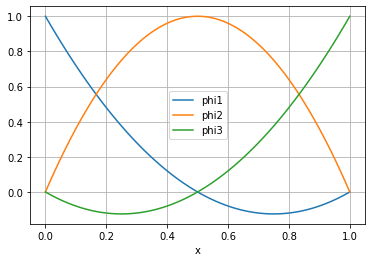

In [4]:
sym.var('x')
phi1 = 2*(1-x)*(0.5-x)
phi2 = 4*x*(1-x)
phi3 = 2*x*(x-0.5)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, 0.,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)
phi3_lambda = sym.lambdify(x, phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(0,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

### Assume element length h and thus scaling with h

contribution to the stiffness matrix
⎡ 7   -8    1 ⎤
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢-8    16  -8 ⎥
⎢───  ───  ───⎥
⎢3⋅h  3⋅h  3⋅h⎥
⎢             ⎥
⎢ 1   -8    7 ⎥
⎢───  ───  ───⎥
⎣3⋅h  3⋅h  3⋅h⎦
contribution to the mass matrix
⎡2⋅h  h    -h ⎤
⎢───  ──   ───⎥
⎢ 15  15    30⎥
⎢             ⎥
⎢h    8⋅h  h  ⎥
⎢──   ───  ── ⎥
⎢15    15  15 ⎥
⎢             ⎥
⎢-h   h    2⋅h⎥
⎢───  ──   ───⎥
⎣ 30  15    15⎦


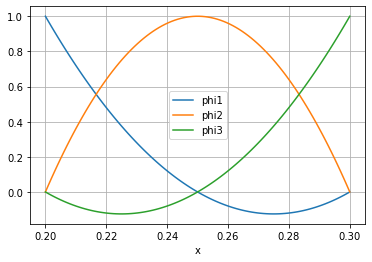

In [5]:
sym.var('x')
sym.var('xl')
sym.var('h')
phi1 = (x-xl-h/2)*(x-xl-h)/(h*h/2)
phi2 = -(x-xl)*(x-xl-h)/(h*h/4)
phi3 = (x-xl)*(x-xl-h/2)/(h*h/2)
phi = sym.Matrix([phi1, phi2, phi3])
dphi = sym.diff(phi, x)
A = sym.integrate(dphi*sym.Transpose(dphi), (x, xl, xl+h))
M = sym.integrate(phi*sym.Transpose(phi), (x, xl, xl+h))
print('contribution to the stiffness matrix'), sym.pprint(sym.simplify(A))
print('contribution to the mass matrix'), sym.pprint(sym.simplify(M))

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify([x, xl, h], phi1)
phi2_lambda = sym.lambdify([x, xl, h], phi2)
phi3_lambda = sym.lambdify([x, xl, h], phi3)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xl = 0.2; h = 0.1 
xvec = np.linspace(xl,xl+h,nsamples)
phi1_vec = phi1_lambda(xvec,xl,h)
phi2_vec = phi2_lambda(xvec,xl,h)
phi3_vec = phi3_lambda(xvec,xl,h)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.xlabel('x')
plt.legend(loc='best')
plt.grid()
plt.show()

## Section 3.2: One-Dimensional Cubic Hermite Shape Functions

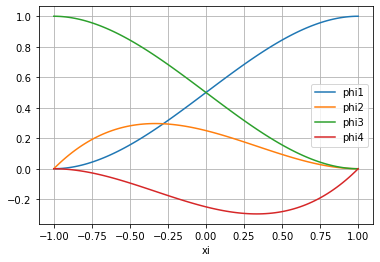

In [6]:
sym.var('x')
phi1 = (2 + 3 * x - pow(x,3))/4
phi2 = (1 - x - pow(x,2) + pow(x,3))/4
phi3 = (2 - 3 * x + pow(x,3))/4
phi4 = (-1 - x + pow(x,2) + pow(x,3))/4
phi = sym.Matrix([phi1, phi2, phi3, phi4])
d2phi = sym.diff(phi,x,x)
A = sym.integrate(d2phi*sym.Transpose(d2phi), (x, -1,1))
M = sym.integrate(phi*sym.Transpose(phi), (x, -1,1))

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(x, phi1)
phi2_lambda = sym.lambdify(x, phi2)
phi3_lambda = sym.lambdify(x, phi3)
phi4_lambda = sym.lambdify(x, phi4)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(-1,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)
phi4_vec = phi4_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.plot(xvec,phi4_vec,label='phi4')
plt.xlabel('xi')
plt.legend(loc='best')
plt.grid()
plt.show()


In [7]:
2*A

Matrix([
[ 3, -3, -3, -3],
[-3,  4,  3,  2],
[-3,  3,  3,  3],
[-3,  2,  3,  4]])

In [8]:
d2phi

Matrix([
[     -3*x/2],
[(3*x - 1)/2],
[      3*x/2],
[(3*x + 1)/2]])

In [9]:
d2phi*sym.Transpose(d2phi)

Matrix([
[            9*x**2/4,        -3*x*(3*x/2 - 1/2)/2,           -9*x**2/4,        -3*x*(3*x/2 + 1/2)/2],
[-3*x*(3*x/2 - 1/2)/2,            (3*x/2 - 1/2)**2, 3*x*(3*x/2 - 1/2)/2, (3*x/2 - 1/2)*(3*x/2 + 1/2)],
[           -9*x**2/4,         3*x*(3*x/2 - 1/2)/2,            9*x**2/4,         3*x*(3*x/2 + 1/2)/2],
[-3*x*(3*x/2 + 1/2)/2, (3*x/2 - 1/2)*(3*x/2 + 1/2), 3*x*(3*x/2 + 1/2)/2,            (3*x/2 + 1/2)**2]])

contribution to the stiffness matrix
⎡       -23                  ⎤
⎢3/10   ────   -3/10   7/160 ⎥
⎢       160                  ⎥
⎢                            ⎥
⎢-23      17     23          ⎥
⎢────    ───    ───    -1/30 ⎥
⎢160     240    160          ⎥
⎢                            ⎥
⎢         23                 ⎥
⎢-3/10   ───    3/10   -7/160⎥
⎢        160                 ⎥
⎢                            ⎥
⎢                        47  ⎥
⎢7/160  -1/30  -7/160   ───  ⎥
⎣                       240  ⎦


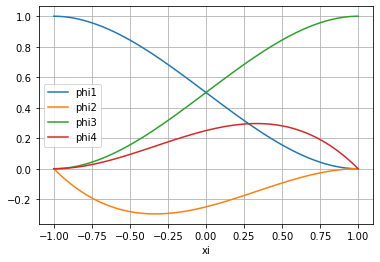

In [10]:
sym.var('xi')
phi1 = (2 - 3 * xi + pow(xi,3))/4
phi2 = -(1 - xi - pow(xi,2) + pow(xi,3))/4
phi3 = (2 + 3 * xi - pow(xi,3))/4
phi4 = -(-1 - xi + pow(xi,2) + pow(xi,3))/4
phi = sym.Matrix([phi1, phi2, phi3, phi4])
d2phi = sym.diff(phi,xi)
A = sym.integrate(d2phi*sym.Transpose(d2phi), (xi, 0,1))
M = sym.integrate(phi*sym.Transpose(phi), (xi, 0,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
# print('contribution to the mass matrix'), sym.pprint(M)

#..lambdify the symbolic expression 
phi1_lambda = sym.lambdify(xi, phi1)
phi2_lambda = sym.lambdify(xi, phi2)
phi3_lambda = sym.lambdify(xi, phi3)
phi4_lambda = sym.lambdify(xi, phi4)

#..sample the lambda expression for the computed solution 
nsamples = 100 
xvec = np.linspace(-1,1,nsamples)
phi1_vec = phi1_lambda(xvec)
phi2_vec = phi2_lambda(xvec)
phi3_vec = phi3_lambda(xvec)
phi4_vec = phi4_lambda(xvec)

#..plot the computed solution 
plt.plot(xvec,phi1_vec,label='phi1')
plt.plot(xvec,phi2_vec,label='phi2')
plt.plot(xvec,phi3_vec,label='phi3')
plt.plot(xvec,phi4_vec,label='phi4')
plt.xlabel('xi')
plt.legend(loc='best')
plt.grid()
plt.show()

In [11]:
d2phi

Matrix([
[        3*xi**2/4 - 3/4],
[-3*xi**2/4 + xi/2 + 1/4],
[        3/4 - 3*xi**2/4],
[-3*xi**2/4 - xi/2 + 1/4]])

In [12]:
d2phi*sym.Transpose(d2phi)

Matrix([
[                       (3*xi**2/4 - 3/4)**2,         (3*xi**2/4 - 3/4)*(-3*xi**2/4 + xi/2 + 1/4),         (3/4 - 3*xi**2/4)*(3*xi**2/4 - 3/4),         (3*xi**2/4 - 3/4)*(-3*xi**2/4 - xi/2 + 1/4)],
[(3*xi**2/4 - 3/4)*(-3*xi**2/4 + xi/2 + 1/4),                        (-3*xi**2/4 + xi/2 + 1/4)**2, (3/4 - 3*xi**2/4)*(-3*xi**2/4 + xi/2 + 1/4), (-3*xi**2/4 - xi/2 + 1/4)*(-3*xi**2/4 + xi/2 + 1/4)],
[        (3/4 - 3*xi**2/4)*(3*xi**2/4 - 3/4),         (3/4 - 3*xi**2/4)*(-3*xi**2/4 + xi/2 + 1/4),                        (3/4 - 3*xi**2/4)**2,         (3/4 - 3*xi**2/4)*(-3*xi**2/4 - xi/2 + 1/4)],
[(3*xi**2/4 - 3/4)*(-3*xi**2/4 - xi/2 + 1/4), (-3*xi**2/4 - xi/2 + 1/4)*(-3*xi**2/4 + xi/2 + 1/4), (3/4 - 3*xi**2/4)*(-3*xi**2/4 - xi/2 + 1/4),                        (-3*xi**2/4 - xi/2 + 1/4)**2]])

# 2D FEM: Symbolic Computation of Elementary Stiffness and Mass Matrix 

### Linear Lagrange Triangle
Remarks: 
1. For plotting of shape function in Julia, see e.g. [this page](https://discourse.julialang.org/t/contour-plot-for-non-rectangular-domain/57381). Ask chatGTP to translate into Python? 
2. Plots on the linear basis function are on the documentation of the [MinFEM](https://minfem.github.io/MinFEM.jl/stable/fem/) package.
3. Mass-matrix using exact integration results in non-diagonal mass matrices. For linear elements this can be avoided using approximate rules of integration. Not sure how to handle this for quadratic elements (see literature mass-lumping for quadratic elements). 

In [13]:
sym.var('x')
sym.var('y')
phi1 = 1-x-y
phi2 = x
phi3 = y
phi = sym.Matrix([phi1, phi2, phi3])
dxphi = sym.diff(phi, x)
dyphi = sym.diff(phi, y)
dxPhidxPhi = dxphi*sym.Transpose(dxphi) 
dyPhidyPhi = dyphi*sym.Transpose(dyphi)
dphidphi   = dxPhidxPhi + dyPhidyPhi 
A = sym.integrate(sym.integrate(dphidphi, (y,0,1-x)),(x, 0.,1))
M = sym.integrate(sym.integrate(phi*sym.Transpose(phi),(y,0,1-x)),(x, 0.,1))
print('contribution to the stiffness matrix'), sym.pprint(A)
print('contribution to the mass matrix'), sym.pprint(M)

contribution to the stiffness matrix
⎡ 1    -1/2  -1/2⎤
⎢                ⎥
⎢-1/2  1/2    0  ⎥
⎢                ⎥
⎣-1/2   0    1/2 ⎦
contribution to the mass matrix
⎡1/12  1/24  1/24⎤
⎢                ⎥
⎢1/24  1/12  1/24⎥
⎢                ⎥
⎣1/24  1/24  1/12⎦


(None, None)

### Quadratic Lagrange Triangle
For expressions of quadratic shape funcrtions, see e.g. [CE60130 FEM Lecture Slides](https://coast.nd.edu/jjwteach/www/www/60130/New%20Lecture%20Notes_PDF/CE60130_Lecture%2015%20with_footer-v04.pdf) 

For plots of the shape functions, extension of the linear case should be feasible. 

In [14]:
sym.var('x')
sym.var('y')
xi1 = 1-x-y
xi2 = x
xi3 = y
phi1 = 2*xi1*xi1 - xi1 
phi2 = 2*xi2*xi2 - xi2
phi3 = 2*xi3*xi3 - xi3
phi4 = 4*xi1*xi2
phi5 = 4*xi2*xi3
phi6 = 4*xi3*xi1
phi = sym.Matrix([phi1, phi2, phi3, phi4, phi5, phi6])
dxphi = sym.diff(phi, x)
dyphi = sym.diff(phi, y)
dxPhidxPhi = dxphi*sym.Transpose(dxphi) 
dyPhidyPhi = dyphi*sym.Transpose(dyphi)
dphidphi   = dxPhidxPhi + dyPhidyPhi 
A = sym.integrate(sym.integrate(dphidphi, (y,0,1-x)),(x, 0.,1))
M = sym.integrate(sym.integrate(phi*sym.Transpose(phi),(y,0,1-x)),(x, 0.,1))
f = sym.integrate(sym.integrate(phi,(y,0,1-x)),(x, 0.,1))
print('contribution to the stiffness matrix (rational numbers)'), sym.pprint(A)
print('contribution to the stiffness matrix (float numbers)'), sym.pprint(A.evalf(4))
print('contribution to the mass matrix'), sym.pprint(M)
print('contribution to the vector (assuming f(x,y) = 1)'), sym.pprint(f.evalf(4))

contribution to the stiffness matrix (rational numbers)
⎡ 1    1/6   1/6   -2/3   0    -2/3⎤
⎢                                  ⎥
⎢1/6   1/2    0    -2/3   0     0  ⎥
⎢                                  ⎥
⎢1/6    0    1/2    0     0    -2/3⎥
⎢                                  ⎥
⎢-2/3  -2/3   0    8/3   -4/3   0  ⎥
⎢                                  ⎥
⎢ 0     0     0    -4/3  8/3   -4/3⎥
⎢                                  ⎥
⎣-2/3   0    -2/3   0    -4/3  8/3 ⎦
contribution to the stiffness matrix (float numbers)
⎡  1.0    0.1667   0.1667   -0.6667    0     -0.6667⎤
⎢                                                   ⎥
⎢0.1667     0.5       0     -0.6667    0        0   ⎥
⎢                                                   ⎥
⎢0.1667      0       0.5       0       0     -0.6667⎥
⎢                                                   ⎥
⎢-0.6667  -0.6667     0      2.667   -1.333     0   ⎥
⎢                                                   ⎥
⎢   0        0        0     -1.333   2.667   -1.333 

(None, None)

In [16]:
sym.expand(phi)

Matrix([
[2*x**2 + 4*x*y - 3*x + 2*y**2 - 3*y + 1],
[                             2*x**2 - x],
[                             2*y**2 - y],
[                  -4*x**2 - 4*x*y + 4*x],
[                                  4*x*y],
[                  -4*x*y - 4*y**2 + 4*y]])

In [19]:
sym.expand(dxphi)

Matrix([
[ 4*x + 4*y - 3],
[       4*x - 1],
[             0],
[-8*x - 4*y + 4],
[           4*y],
[          -4*y]])

In [18]:
sym.expand(dyphi)

Matrix([
[ 4*x + 4*y - 3],
[             0],
[       4*y - 1],
[          -4*x],
[           4*x],
[-4*x - 8*y + 4]])

In [17]:
sym.expand(phi2)

2*x**2 - x

In [18]:
sym.expand(phi3)

2*y**2 - y

In [19]:
sym.expand(phi4)

-4*x**2 - 4*x*y + 4*x

In [32]:
sym.expand(phi5)

4*x*y

In [33]:
sym.expand(phi6)

-4*x*y - 4*y**2 + 4*y

In [34]:
dphidphi

Matrix([
[                                   2*(4*x + 4*y - 3)**2,  (4*x - 1)*(4*x + 4*y - 3),  (4*y - 1)*(4*x + 4*y - 3), -4*x*(4*x + 4*y - 3) + (-8*x - 4*y + 4)*(4*x + 4*y - 3), 4*x*(4*x + 4*y - 3) + 4*y*(4*x + 4*y - 3), -4*y*(4*x + 4*y - 3) + (-4*x - 8*y + 4)*(4*x + 4*y - 3)],
[                              (4*x - 1)*(4*x + 4*y - 3),               (4*x - 1)**2,                          0,                              (4*x - 1)*(-8*x - 4*y + 4),                             4*y*(4*x - 1),                                          -4*y*(4*x - 1)],
[                              (4*y - 1)*(4*x + 4*y - 3),                          0,               (4*y - 1)**2,                                          -4*x*(4*y - 1),                             4*x*(4*y - 1),                              (4*y - 1)*(-4*x - 8*y + 4)],
[-4*x*(4*x + 4*y - 3) + (-8*x - 4*y + 4)*(4*x + 4*y - 3), (4*x - 1)*(-8*x - 4*y + 4),             -4*x*(4*y - 1),                           16*x**2 + (-8*x - 4*y + 4)**2,     

## Sandbox 

In [7]:
from sympy import sin, cos, symbols, pi
sym.var('x')
phi = x*(x-1)*sin(pi*x*x)
sym.simplify(sym.diff(phi,x,x))

-4*pi**2*x**4*sin(pi*x**2) + 4*pi**2*x**3*sin(pi*x**2) + 10*pi*x**2*cos(pi*x**2) - 6*pi*x*cos(pi*x**2) + 2*sin(pi*x**2)